In [1]:
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np

/Users/vsvsvarma/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels={
    0:'Airplane',
    1:'Automobile',
    2:'Bird',
    3:'Cat',
    4:'Deer',
    5:'Dog',
    6:'Frog',
    7:'Horse',
    8:'Ship',
    9:'Truck',
}

array([1], dtype=uint8)

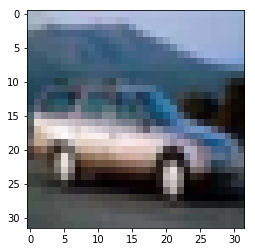

In [5]:
plt.imshow(x_train[4])
y_train[4]

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.50))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
__________

In [9]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
50000/50000 [==============================] - 127s 3ms/step - loss: 2.6152 - acc: 0.2555
Epoch 2/10
50000/50000 [==============================] - 129s 3ms/step - loss: 1.6661 - acc: 0.3900
Epoch 3/10
50000/50000 [==============================] - 138s 3ms/step - loss: 1.5606 - acc: 0.4321
Epoch 4/10
50000/50000 [==============================] - 142s 3ms/step - loss: 1.4884 - acc: 0.4613
Epoch 5/10
50000/50000 [==============================] - 143s 3ms/step - loss: 1.4337 - acc: 0.4859
Epoch 6/10
50000/50000 [==============================] - 143s 3ms/step - loss: 1.3888 - acc: 0.5016
Epoch 7/10
50000/50000 [==============================] - 131s 3ms/step - loss: 1.3555 - acc: 0.5186
Epoch 8/10
50000/50000 [==============================] - 126s 3ms/step - loss: 1.3179 - acc: 0.5320
Epoch 9/10
50000/50000 [==============================] - 129s 3ms/step - loss: 1.2887 - acc: 0.5451
Epoch 10/10
43488/50000 [=========================>....] - ETA: 17s - loss: 1.2622 - acc: 0

In [ ]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

In [ ]:
pred=model.predict(x_test)

In [ ]:
plt.imshow(x_test[698])
print(labels[np.argmax(pred[698])])